In [1]:
%matplotlib inline
import os, re, csv, time
import numpy as np
import pandas as pd
from scipy import ndimage, misc
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from scipy.stats import pearsonr
from matplotlib.colors import LogNorm, Normalize
import DECODE_function as AWAS
%config IPCompleter.greedy=True

In [2]:
target_barcode_p53=[188,105,117,129,141,153,165,177,189,106,118]
target_barcode_p53_clone=["A1","Bp53-12","C-11","D-11","DO-1","DO-2","DO-7","pAb122","Pab1801","Pab240","Pab246"]
FPr=r"Y:\DECODE_Ab\AWAS\DrMatsumoto_F0713_h434-5_mouse\Mono_3_R1"
targetID =8280#mouse c-Fos

In [3]:
flist = [d for d in os.listdir(FPr)]

In [4]:
flist

['001.bin',
 '002.bin',
 '003.bin',
 '004.bin',
 '005.bin',
 '006.bin',
 '007.bin',
 '008.bin',
 '009.bin',
 '010.bin',
 '011.bin',
 '013.bin',
 '014.bin',
 '015.bin',
 '016.bin',
 '017.bin',
 '018.bin',
 '019.bin',
 '020.bin',
 '021.bin',
 '022.bin',
 '023.bin',
 '024.bin',
 '025.bin',
 '026.bin',
 '027.bin',
 '028.bin',
 '029.bin',
 '030.bin',
 '031.bin',
 '032.bin',
 '033.bin',
 '034.bin',
 '035.bin',
 '037.bin',
 '038.bin',
 '039.bin',
 '040.bin',
 '041.bin',
 '042.bin',
 '043.bin',
 '044.bin',
 '045.bin',
 '046.bin',
 '048.bin',
 '049.bin',
 '050.bin',
 '051.bin',
 '052.bin',
 '053.bin',
 '054.bin',
 '055.bin',
 '056.bin',
 '057.bin',
 '058.bin',
 '059.bin',
 '060.bin',
 '061.bin',
 '062.bin',
 '063.bin',
 '064.bin',
 '065.bin',
 '066.bin',
 '067.bin',
 '068.bin',
 '069.bin',
 '070.bin',
 '072.bin',
 '073.bin',
 '074.bin',
 '075.bin',
 '076.bin',
 '077.bin',
 '078.bin',
 '079.bin',
 '080.bin',
 '081.bin',
 '082.bin',
 '083.bin',
 '084.bin',
 '085.bin',
 '086.bin',
 '087.bin',
 '08

188.bin
targetID:11383


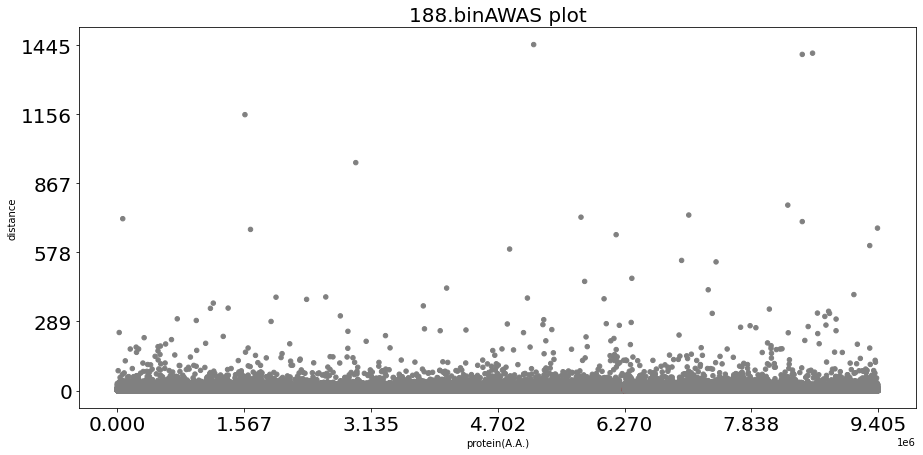

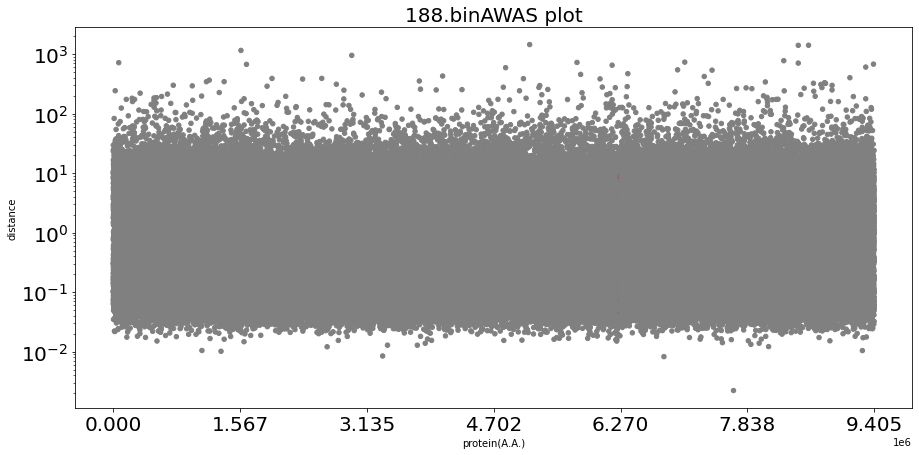

6271468
6271530
6271178
6271440
6271227
6271331
6271364
6271414
6271346
6271271
105.bin
targetID:11383


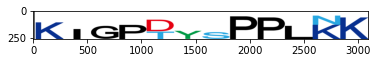

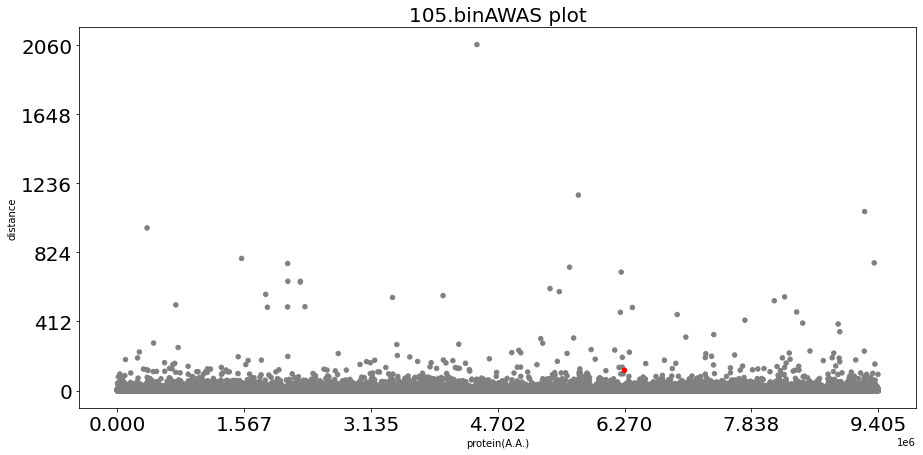

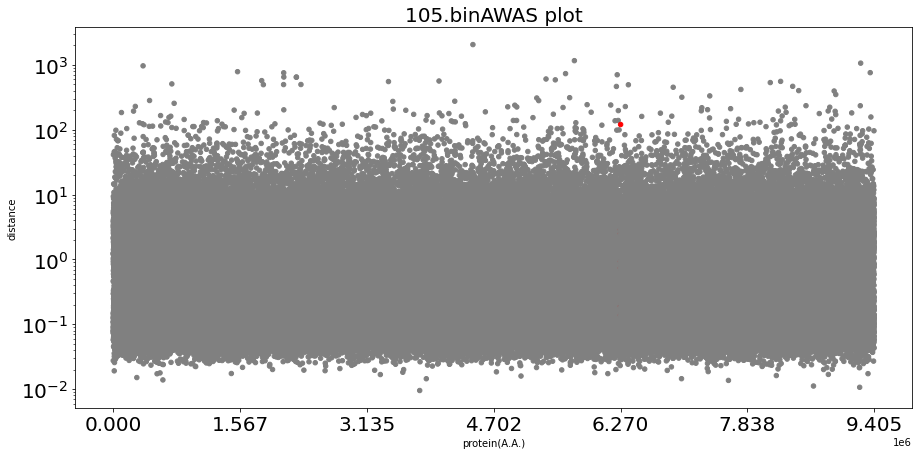

6271175
6271331
6271192
6271515
6271276
6271490
6271379
6271232
6271297
6271463
117.bin
targetID:11383


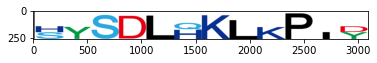

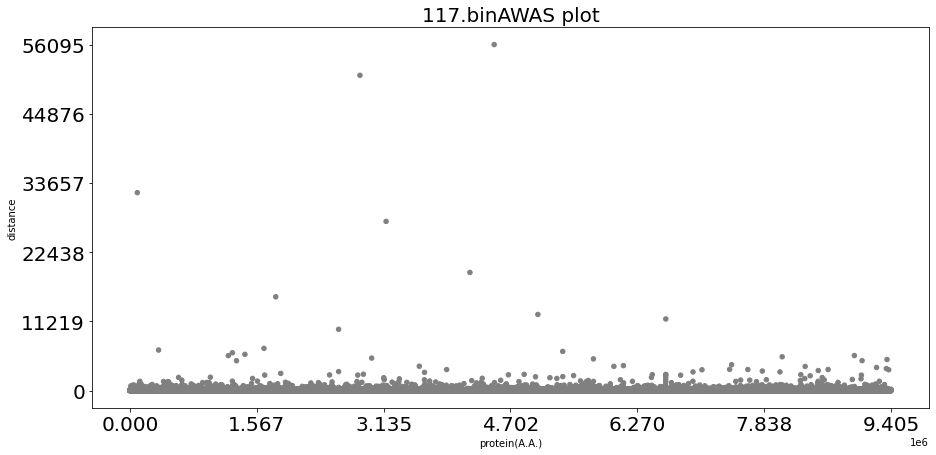

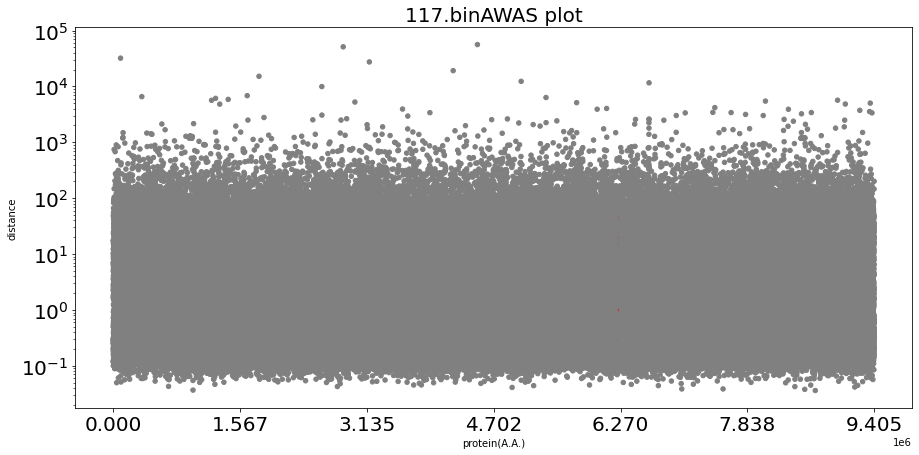

6271441
6271463
6271229
6271181
6271366
6271294
6271271
6271332
6271529
6271398
129.bin
targetID:11383


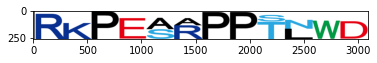

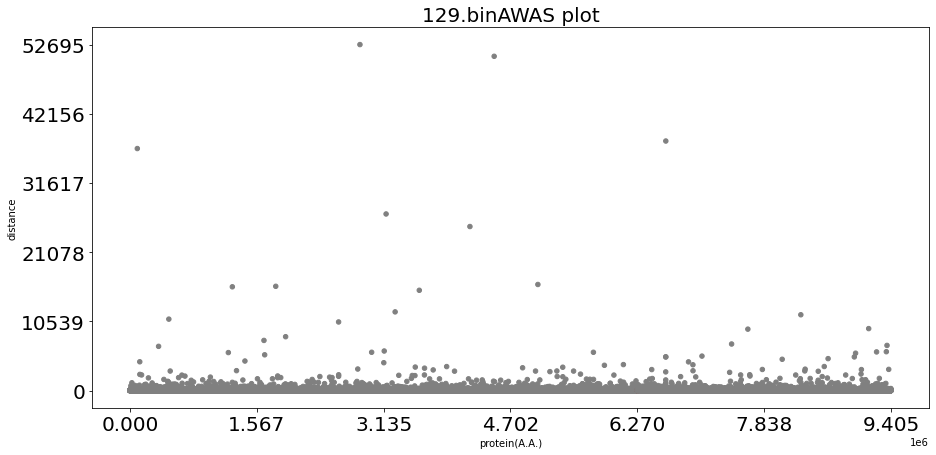

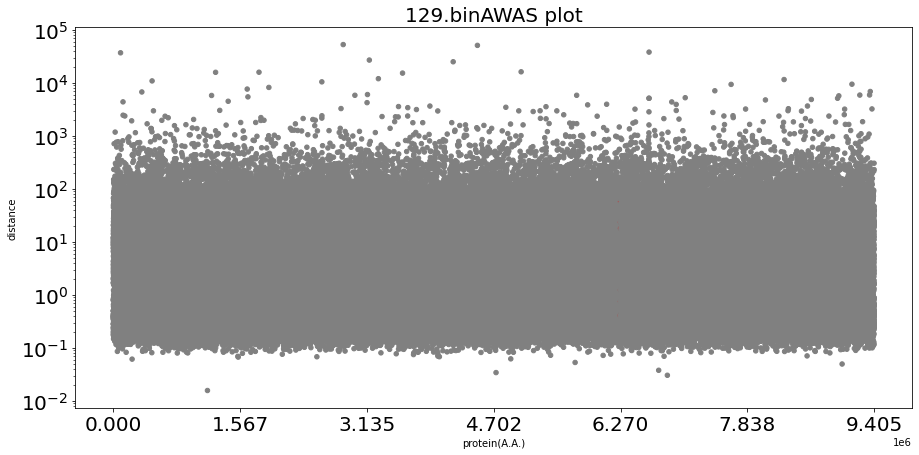

6271442
6271181
6271463
6271229
6271365
6271294
6271270
6271332
6271420
6271529
141.bin
targetID:11383


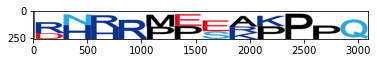

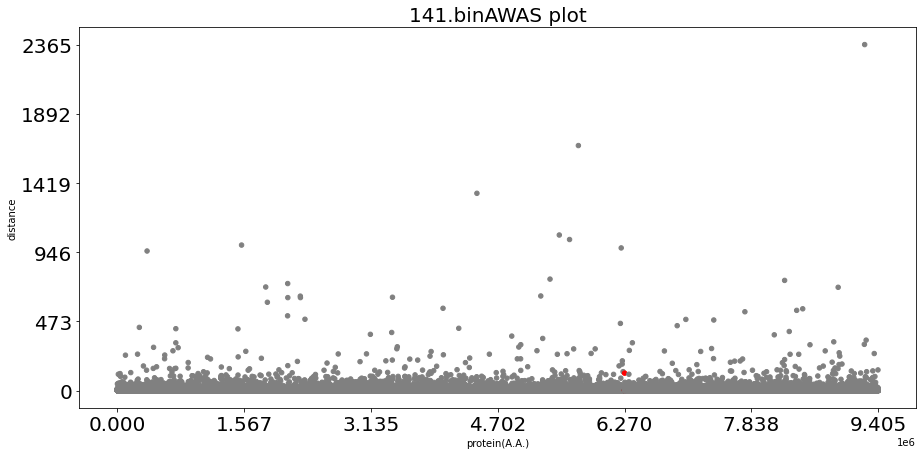

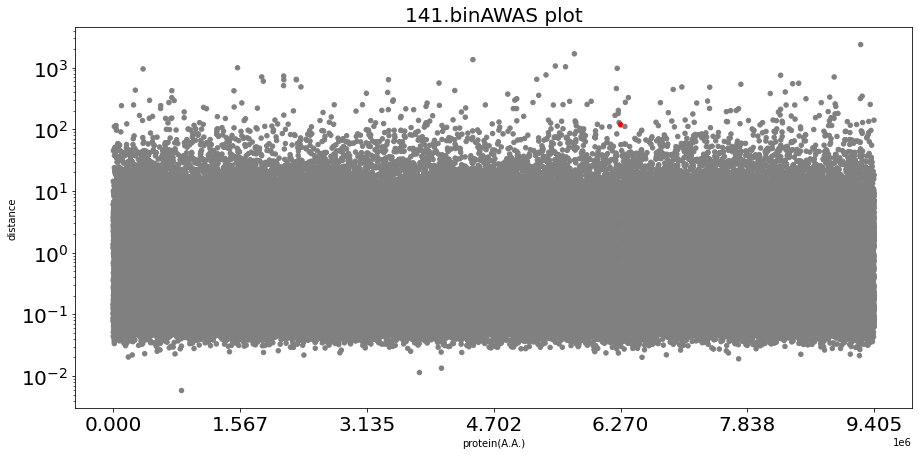

6271173
6271275
6271331
6271515
6271192
6271489
6271422
6271379
6271231
6271463
153.bin
targetID:11383


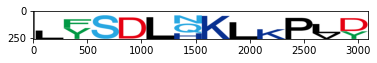

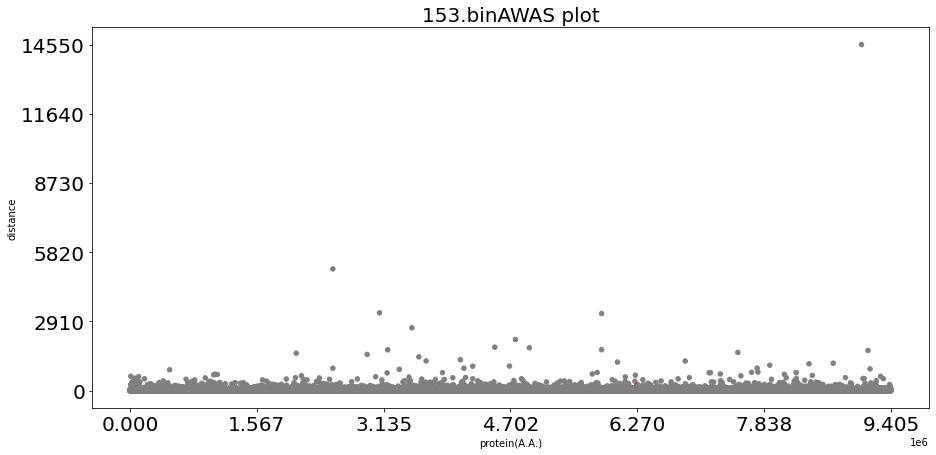

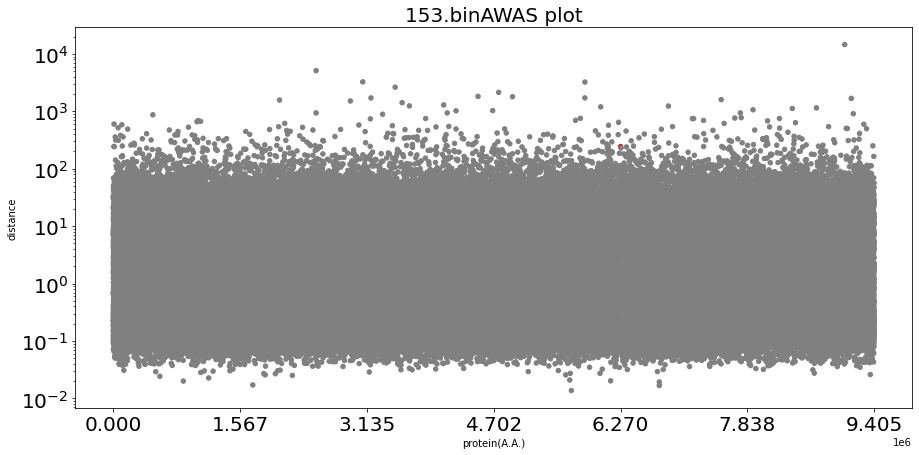

6271164
6271367
6271274
6271462
6271445
6271336
6271297
6271226
6271509
6271395
165.bin
targetID:11383


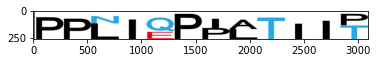

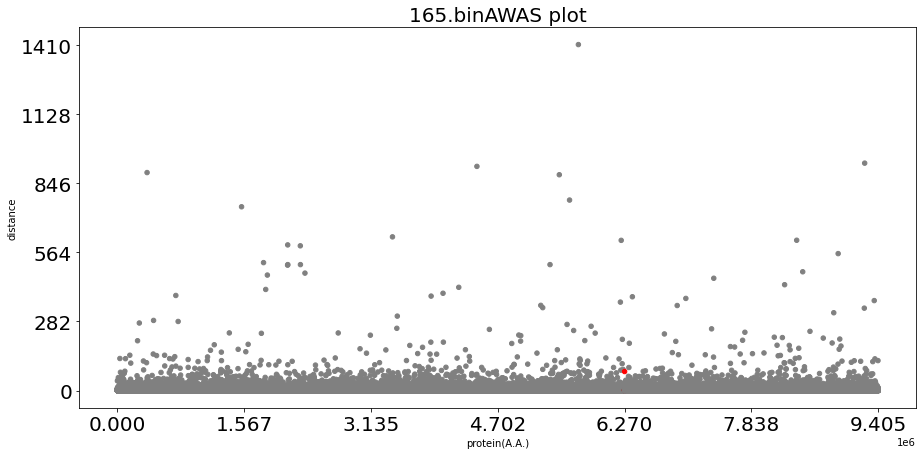

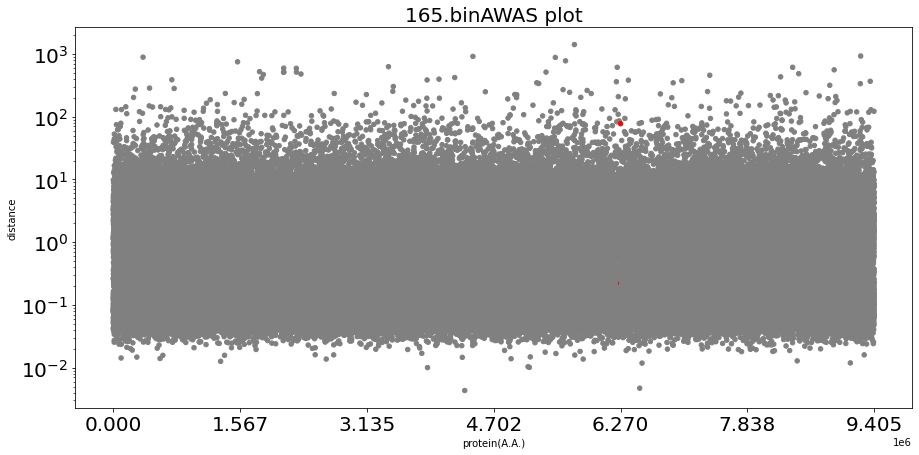

6271173
6271192
6271515
6271331
6271276
6271490
6271423
6271379
6271353
6271464
177.bin
targetID:11383


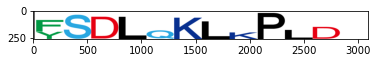

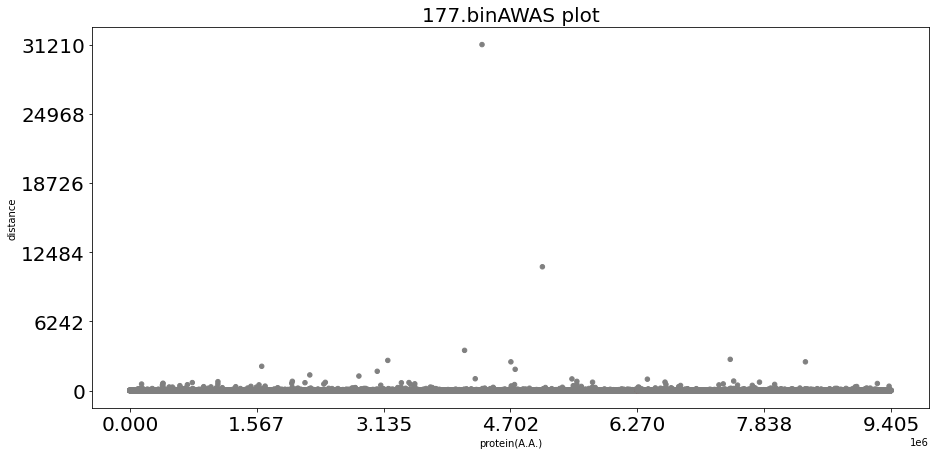

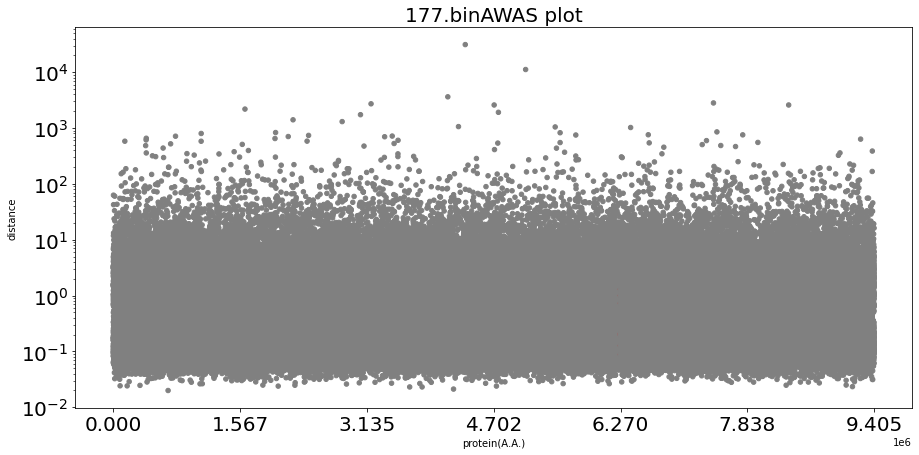

6271345
6271383
6271177
6271311
6271292
6271504
6271237
6271426
6271401
6271223
189.bin
targetID:11383


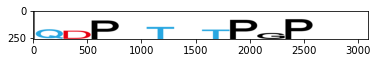

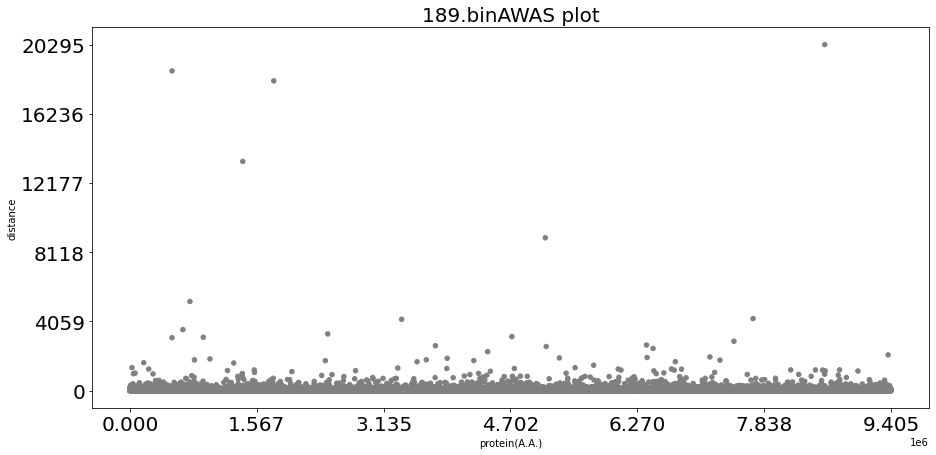

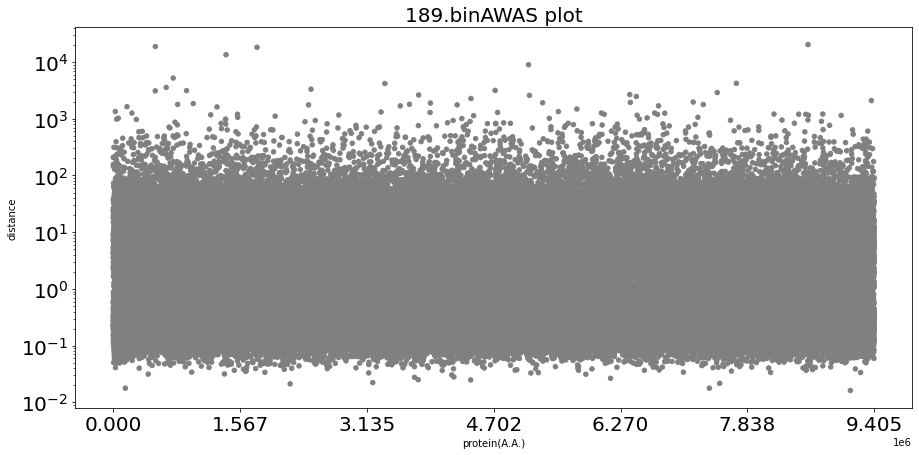

6271233
6271199
6271292
6271371
6271449
6271466
6271355
6271428
6271401
6271511
106.bin
targetID:11383


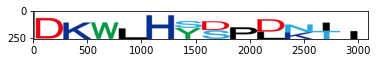

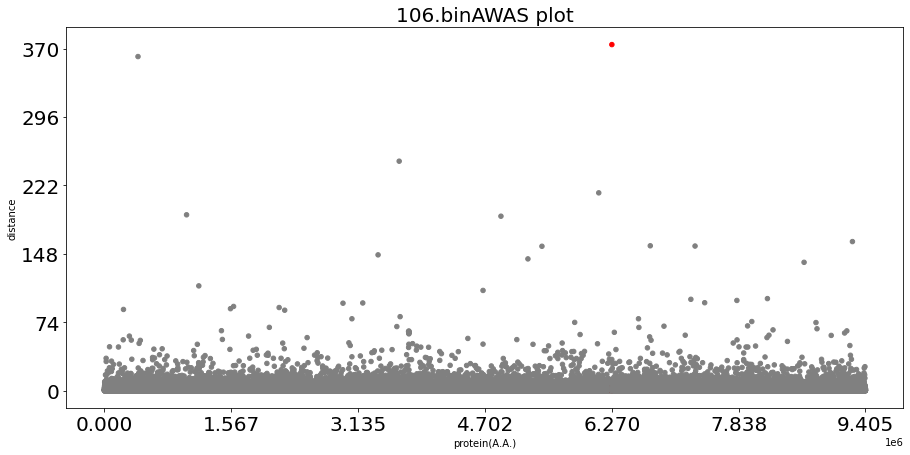

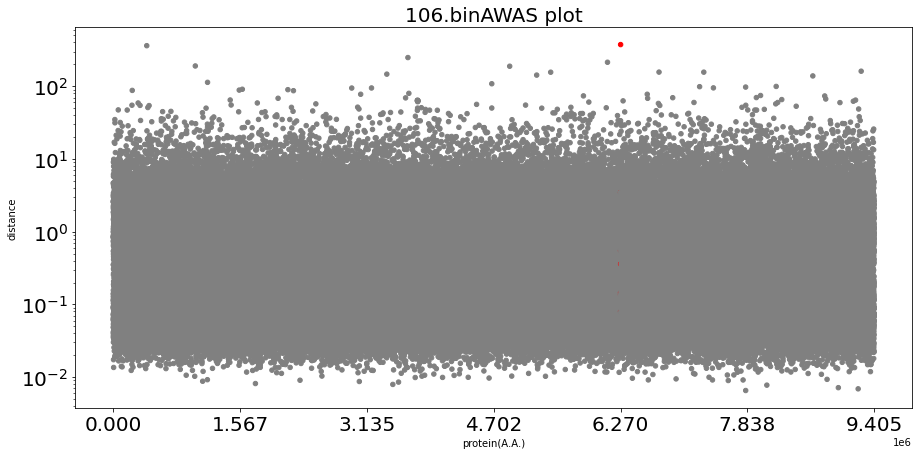

6271359
6271528
6271313
6271439
6271408
6271199
6271381
6271474
6271168
6271341
118.bin
targetID:11383


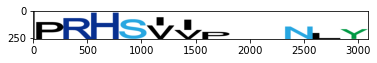

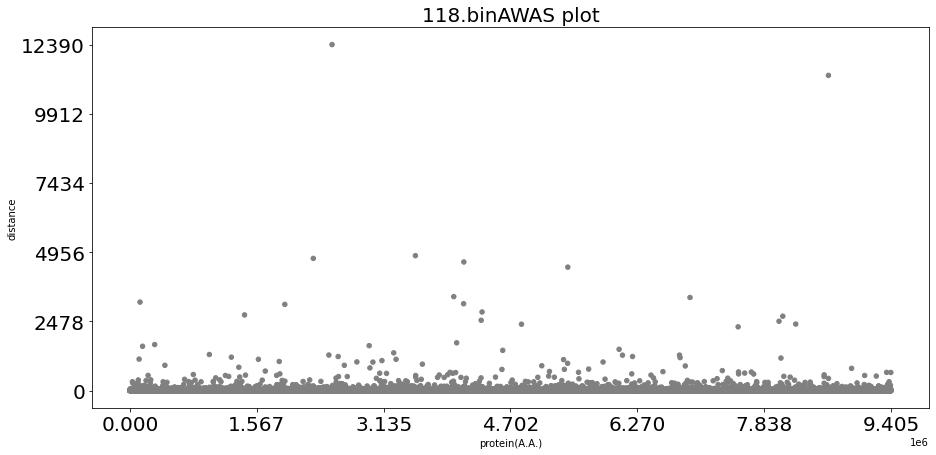

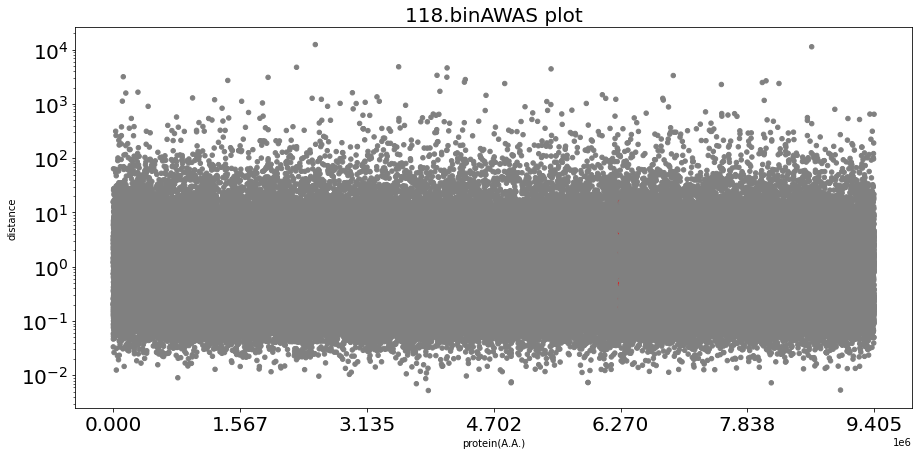

6271320
6271175
6271380
6271478
6271530
6271362
6271343
6271290
6271221
6271446


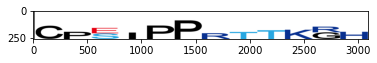

In [5]:
FPw=r"Y:\DECODE_Ab\Result\DrMatsumoto_F0713_h434-5_mouse\Mono_3_R1"
targetID =11383#mouse p53
target_barcode_p53=[188,105,117,129,141,153,165,177,189,106,118]
#figinfo=[fontsize1,width,heigh,dot-size,xlim,ylim,num-of-xticks,num-of-yticks ]
figureinfo=[20,15,7,20,0,0,6,5]
for d in target_barcode_p53:
    b=format(d,'03')+".bin"
    print(b)
    dft=AWAS.MakePlot_Target(FPr,FPw,b,targetID,50,"distance",0,1,figureinfo)

In [ ]:
dfp = pd.DataFrame(index=[])
data=[]
for b, name in zip(target_barcode_p53,target_barcode_p53_clone):
    b= format(b, '003')+".bin"
    #print(b)
    for f in  flist:
        if(f==b):
            print(f+":"+name)
            df=AWAS.Extract_target_protein(FPr+"\\"+f,targetID)
            data.append(df["distance"].rename(name) )
            #data.append(df.rename(columns={'distance': name}))
            break
df = pd.DataFrame(data)
df = df.T
df = df.set_axis(target_barcode_p53_clone, axis=1)
df = df.reset_index(drop=True)

In [ ]:
#arget_barcode_fos_clone=["2H2","HPA","2H2","9F6","HPA","2H2-2","ABE457","C-10","D-1","E-8","neg"]
dft=df.filter(items=['neg','2H2','9F6', 'C-10','D-1'])


In [ ]:
df.to_csv(FPw+"\\data2.csv")

In [ ]:
FPw=r"Y:\DECODE_Ab\Result\DrMatsumoto_F0713_h434-5_mouse\Mono_3_R1\targetplot-c-Fos"
if not os.path.exists(FPw):
        os.makedirs(FPw)
df2=AWAS.minmax_norm(dft)
Color="OrRd"
df2[df2 <= 0] = 0.000000001
plt.show()
sns.set(rc = {'figure.figsize':(15,12)})
sns.heatmap(df2.T, cmap=Color, vmin=0.01, vmax=1.0, norm=LogNorm())
plt.savefig(FPw+"\\heatmap_distance_log_"+Color+".png")
plt.savefig(FPw+"\\heatmap_distance_log_"+Color+".svg")
plt.show()
sns.set(rc = {'figure.figsize':(15,12)})
sns.heatmap(df2.T, cmap=Color, vmin=0, vmax=1)
plt.savefig(FPw+"\\heatmap_distance_nolog_"+Color+".png")
plt.savefig(FPw+"\\heatmap_distance_nolog_"+Color+".svg")
dft.to_csv(FPw+"\\data.csv")

In [ ]:
df

In [ ]:
plt.plot(df["C-10"])

In [ ]:
plt.plot(df["D-1"])

In [ ]:
plt.plot(df["neg"])

In [ ]:
df

In [ ]:
df2 = df.reset_index()

In [ ]:
plt.plot(df["2H2"])

In [ ]:
plt.plot(df["9F6"])

In [ ]:
df_9F6=AWAS.Extract_target_protein(FPr+"\\"+"069.bin",targetID)

In [ ]:
plt.plot(df_9F6["distance"])

In [ ]:
print(dff)

In [ ]:
FPr1=r"Y:\DECODE_Ab\AWAS\DrMatsumoto_F0713_h434-5\Mono_3_R1"
FPr2=r"X:\DECODE\AWAS_analysis_result\0805_p53_BLOSUM_wHuman_Th0.0001"
FPw = r"X:\DECODE\AWAS_analysis_result\211113_p53_BLOSUM_wHuman_Th0.001_corr"
targetID =12280
LOGO_start=0
LOGO_length =14
flist=[]
#P_TH = ["1","0.05","0.01","0.005","0.001","0.0005","0.0001", "0.00005","0.00001", "0.000005", "0.000001", "0.0000001"];
AA = "ARNDCQEGHILKMFPSTWYV*"
AAlist=[a for a in AA]

if not os.path.exists(FPw):
    os.makedirs(FPw)
    
FPaa=r'C:\Users\DECODE\Desktop\AA'
AAlist_logo="ARNDCQEGHILKMFPSTWYV"


flist = [d for d in os.listdir(FPr1)]
dfp = pd.DataFrame(index=[])
for f in  flist:
    if(f[-3:]=="csv"):  
        print(f)
        flist2 = [d for d in os.listdir(FPr1+"\\"+f)]
        for f2 in  flist2:
            if(f2[-3:]=="csv"):  
                dfp[f[:-4]] = MakeDataFrame(FPr1+"\\"+f,FPw,f2,f)
df_1=dfp.reindex(columns=target_barcode3)
df_1=df_1.set_axis(target_barcode32, axis=1)

#df_1=df_1.rename(columns=target_barcode32)             
flist = [d for d in os.listdir(FPr2)]
dfp2 = pd.DataFrame(index=[])
for f in  flist:
    if(f[-3:]=="csv"):  
        print(f)
        flist2 = [d for d in os.listdir(FPr2+"\\"+f)]
        for f2 in  flist2:
            if(f2[-3:]=="csv"):  
                dfp2[f[:-4]] = MakeDataFrame(FPr2+"\\"+f,FPw,f2,f)
df_2=dfp2.reindex(columns=target_barcode1)
df_2=df_2.set_axis(target_barcode12, axis=1)
df = pd.concat([df_1, df_2], axis=1)
df=df.reindex(columns=target_barcode)

In [ ]:
df

In [ ]:
df

In [ ]:
df2=minmax_norm(df)
Color="OrRd"
df2[df2 <= 0] = 0.000000001
plt.show()
sns.heatmap(df2, cmap=Color, vmin=0.01, vmax=1.0, norm=LogNorm())
plt.savefig(FPw+"\\heatmap_distance_log_"+Color+".png")
plt.show()
sns.heatmap(df2, cmap=Color, vmin=0.1, vmax=1)
plt.savefig(FPw+"\\heatmap_distance_nolog_"+Color+".png")

df_corr = df.corr()
plt.figure()
df.to_csv(FPw+"\\target_distance_list.csv")
hm = sns.heatmap(df_corr, vmax=1, vmin=-1, center=0,cmap="bwr")
plt.savefig(FPw+"\\heatmap_corr.png")
pg=sns.pairplot(df)
pg.savefig(FPw+"\\pairplot.png")
df_corr.to_csv(FPw+"\\corr.csv")
plt.show()


In [ ]:
for n in 



In [ ]:
df2

In [ ]:
10//5.2

In [ ]:
df_1=dfp.reindex(columns=['058','097', '109','070', '121',"133","082","145","157","094","169","181"])
df_1d=dfp_d.reindex(columns=['058','097', '109','070', '121',"133","082","145","157","094","169","181"])

In [ ]:
dfp2= minmax_norm(df_1)
dfp2=dfp2.fillna("0")
df2=dfp2.astype(float)
df2[df2 <= 0] = 0.000000001
plt.show()
sns.heatmap(df2, cmap="Reds", vmin=0.01, vmax=1, norm=LogNorm())
plt.savefig(FPw+"\\heatmap_read_log_norm_cFosPoly.png")
plt.show()
sns.heatmap(df2, cmap="Reds", vmin=0.0001, vmax=1)
plt.savefig(FPw+"\\heatmap_read_nolog_norm_cFosPoly.png")


In [ ]:
dfp2= minmax_norm(df_1)
dfp2=dfp2.fillna("0")
df2=dfp2.astype(float)
df2[df2 <= 0] = 0.000000001
plt.show()
sns.heatmap(df2, cmap="Reds", vmin=0.01, vmax=1, norm=LogNorm())
plt.savefig(FPw+"\\heatmap_read_log_norm_cFosPoly.png")
plt.show()
sns.heatmap(df2, cmap="Reds", vmin=0.0001, vmax=1)
plt.savefig(FPw+"\\heatmap_read_nolog_norm_cFosPoly.png")


In [ ]:
dfp2= minmax_norm(df_1d)
dfp2=dfp2.fillna("0")
df2=dfp2.astype(float)
df2[df2 <= 0] = 0.000000001
plt.show()
sns.heatmap(df2, cmap="Reds", vmin=0.01, vmax=1, norm=LogNorm())
plt.savefig(FPw+"\\heatmap_distance_log_norm_cFosPoly.png")
plt.show()
sns.heatmap(df2, cmap="Reds", vmin=0.0001, vmax=1)
plt.savefig(FPw+"\\heatmap_distance_nolog_norm_cFosPoly.png")


In [ ]:
df_corr = df_1d.corr()
plt.figure()
hm = sns.heatmap(df_corr, vmax=1, vmin=-1, center=0,cmap="bwr")
plt.savefig(FPw+"\\heatmap_corr_cFos.png")
pg=sns.pairplot(dfp)
pg.savefig(FPw+"\\pairplot_cFos.png")
df_corr.to_csv(FPw+"\\corr_cFos.csv")
plt.show()

In [ ]:
df_1d

In [ ]:
dfp

In [ ]:
df

In [ ]:
ResultLOGO

In [ ]:
int(dfmax["distance"])

In [ ]:
dfmax

In [ ]:
int(maxdistance)

In [ ]:
dfmax

In [ ]:
df_target.iloc[6][3]/maxvalue*512

In [ ]:
 ResultLOGO.size

In [ ]:
 ResultLOGO

In [ ]:
aaaa= Image.new('RGB', (256, 0))

In [ ]:
ResultAA